In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore") 

In [3]:
stock_data = yf.download("AAPL",start = "2024-01-01")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
stock_data.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-01-02,184.532074,187.315366,182.792518,186.033057,82488700
2024-01-03,183.150391,184.770668,182.335277,183.120571,58414500
2024-01-04,180.824356,181.997307,179.800504,181.062914,71983600
2024-01-05,180.098709,181.669281,179.094742,180.903888,62303300
2024-01-08,184.452560,184.492330,180.416793,181.003268,59144500


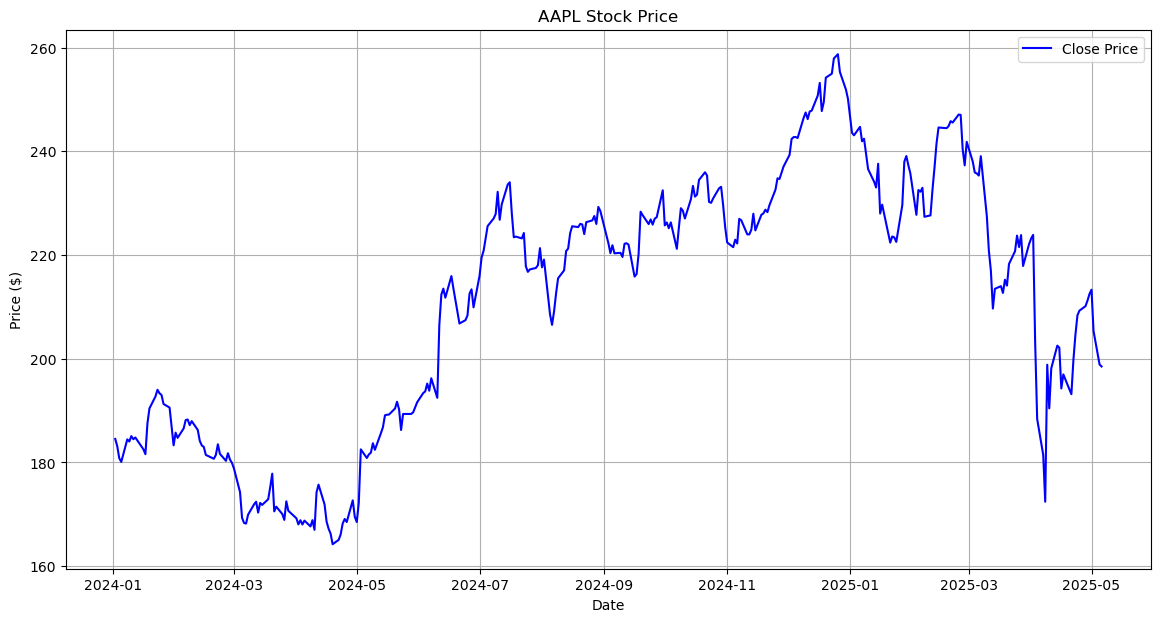

In [5]:
plt.figure(figsize=(14,7))
plt.plot(stock_data.index, stock_data['Close'], label='Close Price', color='blue')
plt.title('AAPL Stock Price')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid()
plt.show()

### Classical Time Series Decomposition

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [7]:
decompositon_additive = seasonal_decompose(stock_data['Close'], model='additive', period=30)

In [8]:
trend_additive = decompositon_additive.trend
seasonal_additive = decompositon_additive.seasonal
residual_additive = decompositon_additive.resid

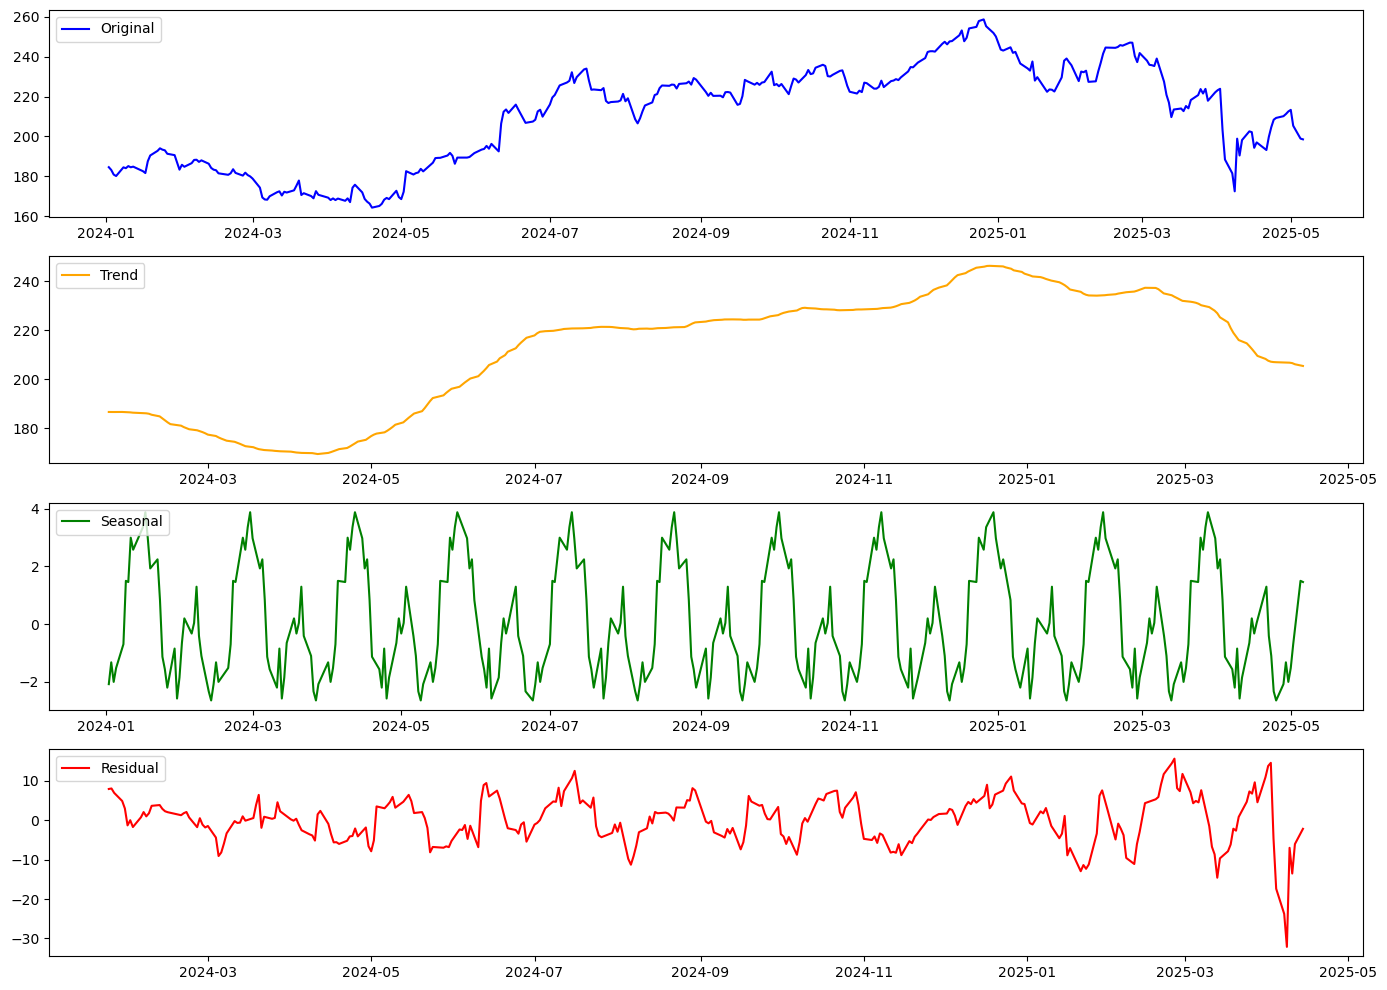

In [9]:
plt.figure(figsize=(14,10))
plt.subplot(411)
plt.plot(stock_data['Close'], label='Original', color='blue')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend_additive, label='Trend', color='orange')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal_additive, label='Seasonal', color='green')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual_additive, label='Residual', color='red')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### STL Decomposition (Seasonal-Trend decomposition using LOESS)

In [10]:
from statsmodels.tsa.seasonal import STL

In [11]:
# Perform STL decomposition
stl = STL(stock_data['Close'], period= 30)
result = stl.fit()

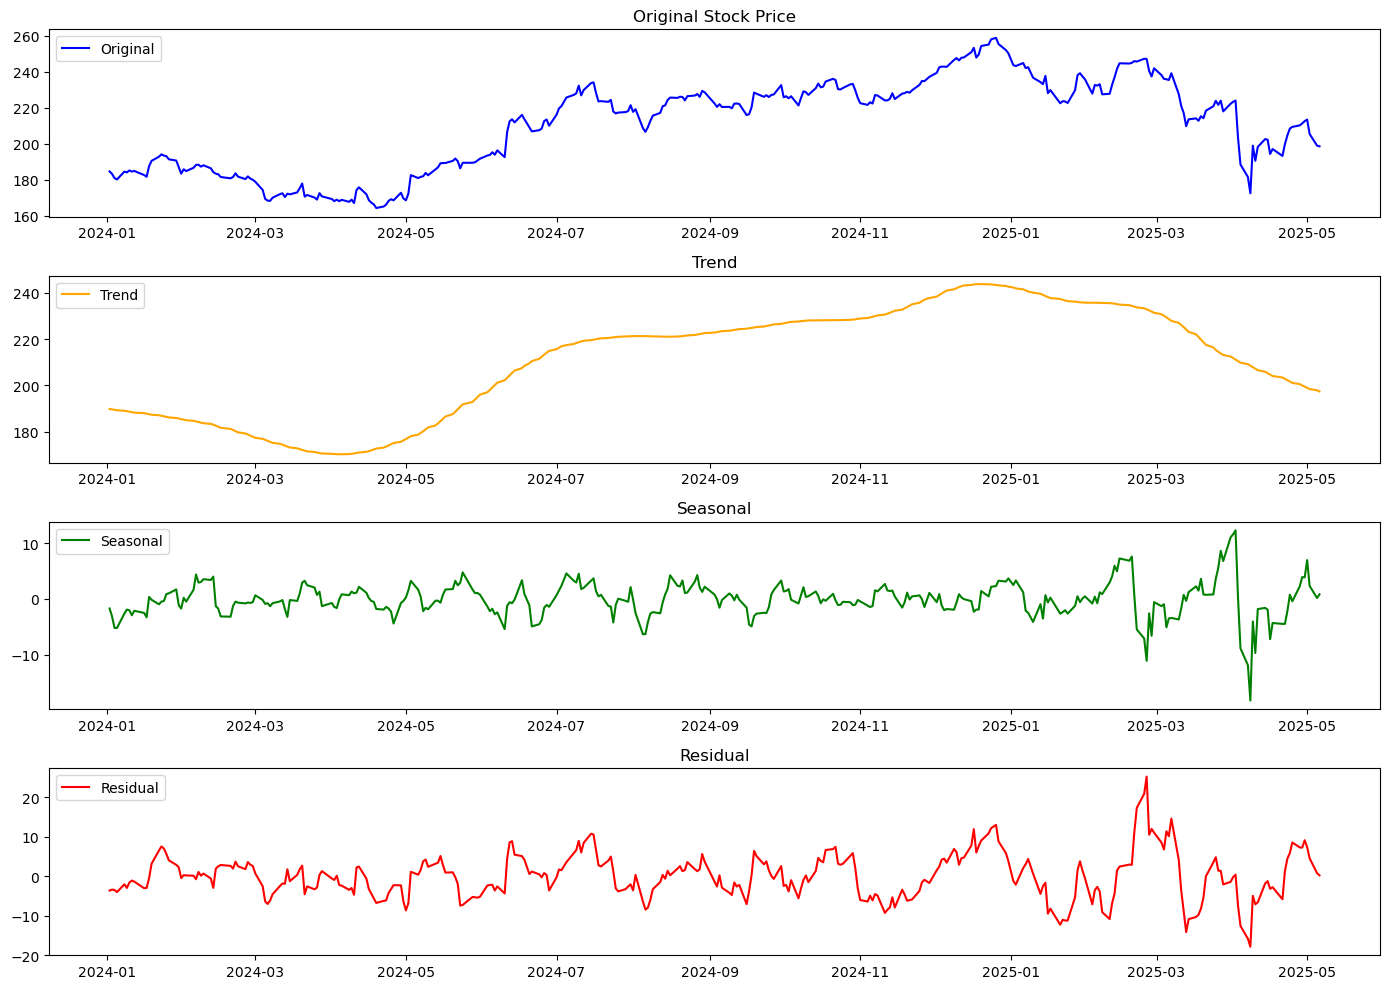

In [12]:
# plot the results
plt.figure(figsize=(14,10))
plt.subplot(411)
plt.plot(stock_data['Close'], label='Original', color='blue')
plt.title('Original Stock Price')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(result.trend, label='Trend', color='orange')
plt.title('Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal', color='green')
plt.title('Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(result.resid, label='Residual', color='red')
plt.title('Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### Stationarity Test


In [13]:
from statsmodels.tsa.stattools import adfuller

In [16]:
#perform Augmented Dickey-Fuller test
adf_test = adfuller(stock_data['Close'])

print('ADF Test Result:')
print(f'ADF Statistic: {round(adf_test[0],3)}')
print(f'p-value: {round(adf_test[1],3)}')
print(f'Critical Values:')
for key, value in adf_test[4].items():
    print(f'   {key}: {round(value,3)}')

ADF Test Result:
ADF Statistic: -1.582
p-value: 0.493
Critical Values:
   1%: -3.45
   5%: -2.87
   10%: -2.571


In [18]:
from statsmodels.tsa.stattools import kpss
# Perform KPSS test
kpss_test = kpss(stock_data['Close'], regression='ct') # 'c' for constant, 'ct' for constant and trend

print('\nKPSS Test Result:')
print(f'KPSS Statistic: {round(kpss_test[0],2)}')
print(f'p-value: {round(kpss_test[1])}')
print(f'Critical Values:')
for key, value in kpss_test[3].items():
    print(f'   {key}: {value}')



KPSS Test Result:
KPSS Statistic: 0.41
p-value: 0
Critical Values:
   10%: 0.119
   5%: 0.146
   2.5%: 0.176
   1%: 0.216


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp


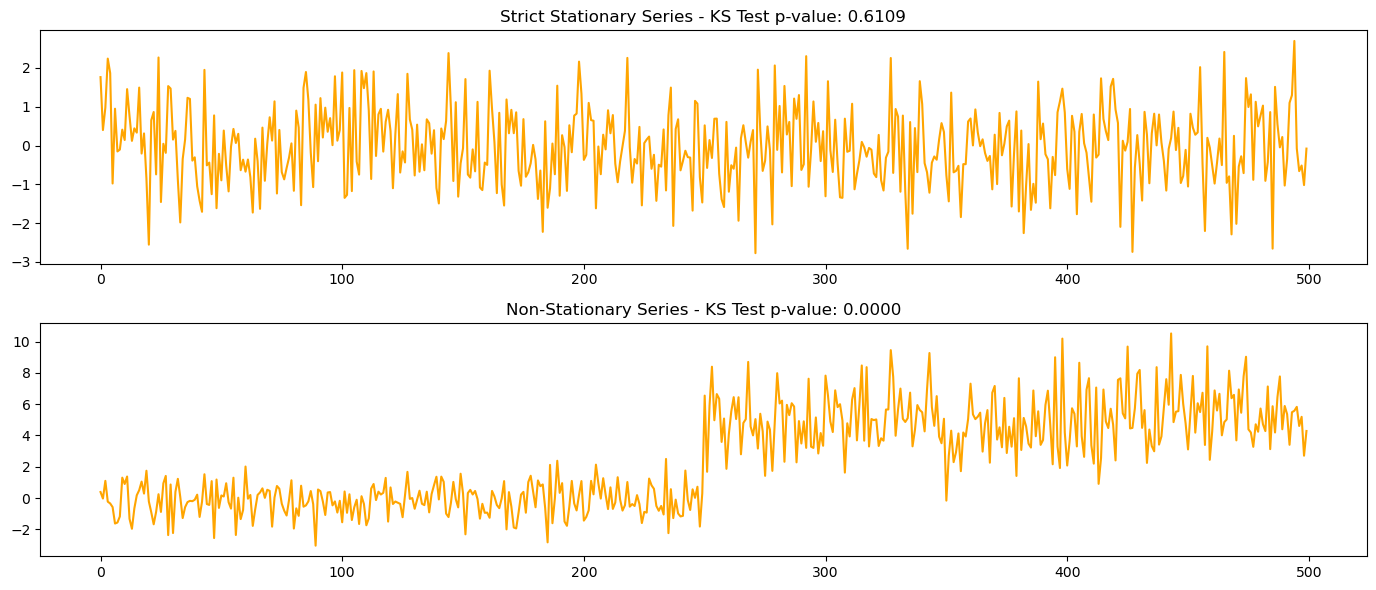

In [29]:
# Generating synthetic data 
np.random.seed(0)
n = 500


# Strictly stationary data : normal distribution random noise
strictly_stationary_data = np.random.normal(0, 1, n)

# Non-stationary data : changing mean and variance
non_strict_stationary_data = np.concatenate([np.random.normal(0, 1, n//2), np.random.normal(5, 2, n//2)])


# Function to split the series into two halves and perform the KS test
def ks_test_stationarity(data):
    split = len(data) // 2
    data1 = data[:split]
    data2 = data[split:]
    ks_stat, p_value = ks_2samp(data1, data2)
    return ks_stat, p_value


# perform the KS test on both datasets
ks_stat_strict, p_value_strict = ks_test_stationarity(strictly_stationary_data)

# perform the KS test on non-stationary data
ks_stat_non_strict, p_value_non_strict = ks_test_stationarity(non_strict_stationary_data)

# Plotting the results
plt.figure(figsize=(14, 6))

# Strictly stationary plot
plt.subplot(2, 1, 1)
plt.plot(strictly_stationary_data, color='orange')
plt.title(f"Strict Stationary Series - KS Test p-value: {p_value_strict:.4f}")

# Non-stationary plot
plt.subplot(2, 1, 2)
plt.plot(non_strict_stationary_data, color='orange')
plt.title(f"Non-Stationary Series - KS Test p-value: {p_value_non_strict:.4f}")

plt.tight_layout()
plt.show()

